## **Gradient Boosting Overview**
Gradient Boosting is a highly effective machine learning method that combines several weak models, often decision trees, into a strong predictive model. <br/> The core concept is to iteratively train models that improve upon the errors made by the previous ones, progressively enhancing overall accuracy. <br/>
As more weak learners are added, residuals decrease, and the predicted values converge toward the actual values.

--- 

* Ensemble Learning: Combines multiple weak models.
* Boosting/Sequential training: A technique where new models are added to fix the errors made by previous models
* Residuals
* Loss Function: A function that measures the error or residuals.
* Gradient Descent: involves iteratively fitting new models to the residuals (gradients) of the current model's predictions
* Feature Importance : quantifies the contribution of each feature to the model’s predictions. Gradient Boosting can compute both ways.

    - **Traditional** Feature Improtance : easier to compute based on metrics like (Split Importance/ Gain / reduction in impurity or error / Coverage) However, it can be misleading, especially in models with feature interactions or correlated features
 
    - **SHAP** Feature Improtnace: provides more accurate, fair, and interpretable insights into feature contributions, particularly in models with complex interactions, Robust to Collinearity

### **Advantages of Gradient Boosting**:
- High Prediction Accuracy
- Handles Complex Data Structures
- Effective in Reducing Bias
- Flexibility with Loss Functions
- Built-in Feature Importance: helping to understand the underlying data better.
- Customization Options: tune gradient boosting models
  
### **Disadvantages of Gradient Boosting**:
- Prone to Overfitting
- Computationally Expensive
- Sensitive to Hyperparameters
- Poor Performance on Noisy Data
- Difficult to Interpret

### **Steps in Gradient Boosting**
<br/>

**1.** Begin by creating an initial model, often referred to as a base model, using the average of the data or the most frequent category. 
<br/>
<br/>
**2.** Compute the residuals by subtracting the predictions made by this base model from the actual values.
<br/>
<br/>
**3.** A new model is then trained on these residuals as the target.
<br/>
<br/>
**4.** With this new model, we get updated predictions for the residuals and then calculate new predicted target values.
<br/>
<br/>
**5.** Repeat this process, where next tree will now take the updated residuals and train on these as the target to predict new residuals.<br/>

In gradient boosting, multiple models are trained in sequence. Each new model focuses on minimizing the loss function by applying the gradient descent method.

t starting point for the gradient boosting process.


# Gradient Boosting Algorithm

### 1. Initialize the model with a constant value

We initialize $F_0(x)$ to minimize the sum of squared errors. With squared error loss, this is typically the mean of the target values $y_i$

$$
F_0(x) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)
$$

---

### Gradient Boosting with Mean Squared Error Loss

#### Loss Function

We are using the mean squared error (MSE) loss function with a scaling factor of $\frac{1}{2n}$:

$$
L(y_i, F(x_i)) = \frac{1}{2n} (y_i - F(x_i))^2
$$

- $L(y_i, F(x_i))$: Loss for observation $i$.
- $y_i$: Actual target value.
- $F(x_i)$: Predicted value from the model.

---

#### Why is $F_0$ the Mean of $Y$?

To initialize the model, we need to find the constant prediction $F_0(x)$ that minimizes the total loss across all observations. Since $F_0(x)$ is a constant function (does not depend on $x$), we can denote it as $F_0(x) = \gamma$.

### Objective:

Find $\gamma$ that minimizes the total loss:

$$
\gamma = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma) = \arg\min_{\gamma} \frac{1}{2n} \sum_{i=1}^{n} (y_i - \gamma)^2
$$

### Simplification:

The scaling factor $\frac{1}{2n}$ is constant with respect to $\gamma$ and does not affect the location of the minimum. Therefore, we can simplify the optimization problem to:

$$
\gamma = \arg\min_{\gamma} \sum_{i=1}^{n} (y_i - \gamma)^2
$$

### Solution:

This is the standard least squares minimization problem. The value of $\gamma$ that minimizes the sum of squared differences is the mean of $y_i$:

$$
\gamma = \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

### Conclusion:

Thus, the initial prediction $F_0(x)$ is the mean of the target variable $Y$:

$$
F_0(x) = \bar{y}
$$

---
### 2. For $m = 1$ to $M$ (number of boosting iterations):

**2.1 Compute Pseudo-residuals:**

$$
r_{im} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x_i) = F_{m-1}(x_i)}
$$


At each iteration $m$, we compute the pseudo-residuals $r_{im}$ for each observation $i$. These residuals are the negative gradients of the loss function with respect to the current predictions $F_{m-1}(x_i)$.


#### Calculating the Gradient:

Given the loss function:

$$
L(y_i, F(x_i)) = \frac{1}{2n} (y_i - F(x_i))^2
$$

Compute the derivative with respect to $F(x_i)$:

$$
\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} = \frac{1}{2n} \cdot 2 (F(x_i) - y_i) = \frac{1}{n} (F(x_i) - y_i)
$$

Evaluate at $F(x_i) = F_{m-1}(x_i)$:

$$
\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \Bigg|_{F(x_i) = F_{m-1}(x_i)} = \frac{1}{n} (F_{m-1}(x_i) - y_i)
$$

$r_{im}$ is:

$$
r_{im} = -\left( \frac{1}{n} (F_{m-1}(x_i) - y_i) \right) = \frac{1}{n} (y_i - F_{m-1}(x_i))
$$

#### Interpretation:

- The pseudo-residual $r_{im}$ is the difference between the actual value $y_i$ and the current prediction $F_{m-1}(x_i)$.
- The scaling factor $\frac{1}{n}$ is constant across all observations.


#### Simplification in Practice:

When fitting the regression tree to the residuals, the constant scaling factor $\frac{1}{n}$ does not affect the determination of the optimal splits or the terminal region values. Therefore, we can simplify the residuals to:

$$
r_{im} = y_i - F_{m-1}(x_i)
$$

This simplification is commonly used in practice for efficiency.
The residuals $r_{im}$ at iteration $m$ are the difference between the actual values and the predicted values from the current model.

---

**2.2 Train a regression tree on residuals:**

We train a regression tree on the residuals to predict how much to adjust the current model.


---

**2.3 Find the optimal terminal region outputs $\gamma_{jm}$:**

For each region (leaf) $R_{jm}$ in the tree, compute the best value $\gamma_{jm}$ that fits the residuals in that region. 
The best value $\gamma_{jm}$ is the average of the residuals in that region:

$$
\gamma_{jm} = \arg\min_{\gamma} \sum_{x_i \in R_{jm}} L(y_i, F_{m-1}(x_i) + \gamma) 
            = \frac{ \sum_{x_i \in R_{jm}} r_{im} }{ |R_{jm}| }
            = \text{Mean of residuals in } R_{jm}
$$



#### Example 

$\gamma_{2,1}$ = (2000+1000)/2

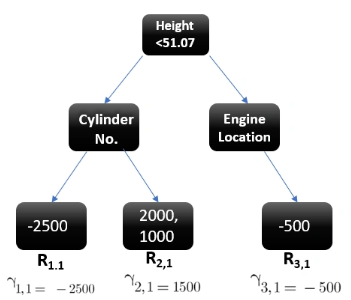

---
**2.4 Update the model:**

Update the model by adding the predicted values from the regression tree, scaled by a learning rate $v$:

$$
F_m(x) = F_{m-1}(x) + \nu \sum_{j=1}^{J_m} \gamma_{jm} \cdot 1(x \in R_{jm})
$$

Where:
- $\nu$ is the learning rate, a small value to control the step size.


#### Exmaple

Initialize the model, $F_0(x)$ = 14500

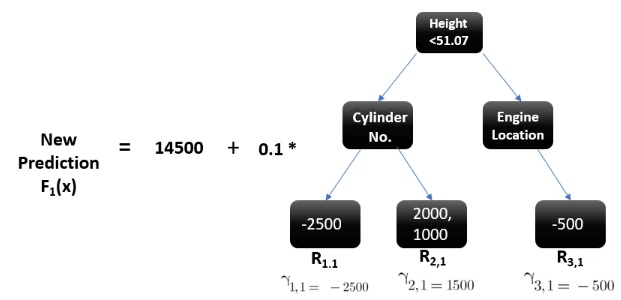

### Gradient boosting classification

In gradient boosting classification, the loss function is typically the log loss (or logistic loss) for binary classification:

$$
L(y_i, p_i) = -\left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

where:
- $y_i$ is the true label (0 or 1), and
- $p_i$ is the predicted probability of lass 1.


### Gradient boosting regression Python code

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Creating a DataFrame with an additional feature 'experience'
df = pd.DataFrame()
df['ID'] = ['A1', 'B2', 'C3', 'D4', 'E5', 'F6']
df['age'] = [25, 32, 47, 51, 30, 38]
df['education'] = ['bachelor', 'master', 'phd', 'phd', 'bachelor', 'highschool']
df['experience'] = [2, 15, 8, 4, 14, 15]  # New feature 'experience'
df['salary'] = [48000, 80000, 75000, 82000, 72000, 56000]
display(df)

n = df.shape[0]
X = df[['age', 'education', 'experience']].copy()

# Converting categorical data to numerical
X.loc[X['education'] == 'bachelor', 'education'] = 1
X.loc[X['education'] == 'master', 'education'] = 2
X.loc[X['education'] == 'phd', 'education'] = 3
X.loc[X['education'] == 'highschool', 'education'] = 0
y = df['salary']
display(X)
display(y)

,ID,age,education,experience,salary
0,A1,25,bachelor,2,48000
1,B2,32,master,15,80000
2,C3,47,phd,8,75000
3,D4,51,phd,4,82000
4,E5,30,bachelor,14,72000
5,F6,38,highschool,15,56000


,age,education,experience
0,25,1,2
1,32,2,15
2,47,3,8
3,51,3,4
4,30,1,14
5,38,0,15


0    48000
1    80000
2    75000
3    82000
4    72000
5    56000
Name: salary, dtype: int64

In [5]:
# Starting gradient boosting implementation
learning_rate = 0.1
loss = [0] * 6
residuals = np.zeros([6, n])
predictions = np.zeros([6, n])

# Initial prediction
average_y = y.mean()
predictions[0] = [average_y] * n
residuals[0] = y - predictions[0]

df['Initial_Prediction'] = predictions[0]
df['Initial_Residual'] = residuals[0]
display(df)

,ID,age,education,experience,salary,Initial_Prediction,Initial_Residual
0,A1,25,bachelor,2,48000,68833.333333,-20833.333333
1,B2,32,master,15,80000,68833.333333,11166.666667
2,C3,47,phd,8,75000,68833.333333,6166.666667
3,D4,51,phd,4,82000,68833.333333,13166.666667
4,E5,30,bachelor,14,72000,68833.333333,3166.666667
5,F6,38,highschool,15,56000,68833.333333,-12833.333333


In [7]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

In [9]:
loss[0] = np.sum(residuals[0] ** 2) / n
trees = []

def iterate(i):
    if i == 0:
        # Initialize the first prediction and residuals
        df[f'Prediction_{i}'] = predictions[i]
        df[f'Residual_{i}'] = residuals[i]
    
    # Fitting a decision tree to the residuals
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X, residuals[i])
    trees.append(tree)
    
    # Update prediction and residuals for the next iteration
    predictions[i+1] = predictions[i] + learning_rate * tree.predict(X)
    residuals[i+1] = y - predictions[i+1]
    loss[i+1] = np.sum(residuals[i+1] ** 2) / n
    
    # Updating DataFrame with new predictions and residuals
    df[f'Gamma_{i+1}'] = tree.predict(X)
    df[f'Prediction_{i+1}'] = predictions[i+1]
    df[f'Residual_{i+1}'] = residuals[i+1]
    
    # Display updated DataFrame
    display(df[['ID', 'age', 'education', 'experience', 'salary', 
                f'Prediction_{i}', f'Residual_{i}', 
                f'Gamma_{i+1}', f'Prediction_{i+1}', f'Residual_{i+1}']])
    
    # Use export_graphviz to create the tree visualization
    dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=X.columns) 
    graph = graphviz.Source(dot_data) 
    display(graph)

,ID,age,education,experience,salary,Prediction_0,Residual_0,Gamma_1,Prediction_1,Residual_1
0,A1,25,bachelor,2,48000,68833.333333,-20833.333333,-20833.333333,66750.0,-18750.0
1,B2,32,master,15,80000,68833.333333,11166.666667,8666.666667,69700.0,10300.0
2,C3,47,phd,8,75000,68833.333333,6166.666667,8666.666667,69700.0,5300.0
3,D4,51,phd,4,82000,68833.333333,13166.666667,13166.666667,70150.0,11850.0
4,E5,30,bachelor,14,72000,68833.333333,3166.666667,-4833.333333,68350.0,3650.0
5,F6,38,highschool,15,56000,68833.333333,-12833.333333,-4833.333333,68350.0,-12350.0


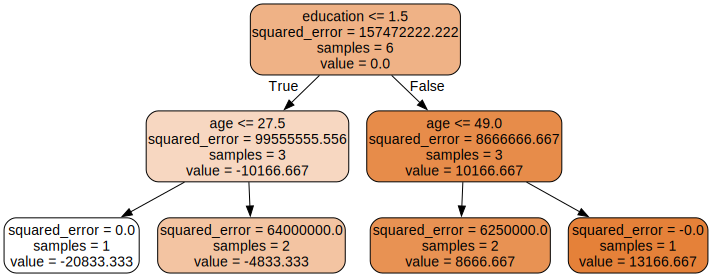

In [11]:
# Example: Running the first iteration
iterate(0)

- $f_1$ = $f_0$ + 0.1*$\gamma_1$ (Based on prediction_0 and gamma)
- $r_1$ = (Actual) Y - $f_1$

**A1** :     $R_{11}$ (terminal region)   <br/>
**B2, C3** : $R_{21}$ (terminal region)   <br/>
**D4** :     $R_{31}$ (terminal region)   <br/>
**E5, F6** : $R_{41}$ (terminal region)  

,ID,age,education,experience,salary,Prediction_1,Residual_1,Gamma_2,Prediction_2,Residual_2
0,A1,25,bachelor,2,48000,66750.0,-18750.0,-18750.0,64875.0,-16875.0
1,B2,32,master,15,80000,69700.0,10300.0,7800.0,70480.0,9520.0
2,C3,47,phd,8,75000,69700.0,5300.0,7800.0,70480.0,4520.0
3,D4,51,phd,4,82000,70150.0,11850.0,11850.0,71335.0,10665.0
4,E5,30,bachelor,14,72000,68350.0,3650.0,-4350.0,67915.0,4085.0
5,F6,38,highschool,15,56000,68350.0,-12350.0,-4350.0,67915.0,-11915.0


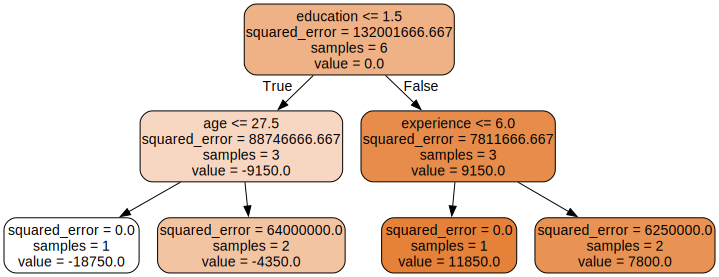

In [13]:
iterate(1)

- $f_2$ = $f_1$ + 0.1*$\gamma_2$ (Based on prediction_1 and gamma)
- $r_2$ = (Actual) Y - $f_2$

### Additional Reading Resources:

- https://www.geeksforgeeks.org/ml-gradient-boosting/
- https://medium.com/analytics-vidhya/intuition-and-implementation-of-gradient-boost-part-1-1728eb463cf0
- https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/